In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df_bat = pd.read_csv('atbats.csv')
df_pitch = pd.read_csv('pitches.csv')

In [3]:
print('df_bat shape: ' + str(df_bat.shape))
print('df_pitch shape: ' + str(df_pitch.shape))

df_bat shape: (740389, 11)
df_pitch shape: (2867154, 40)


In [4]:
df_bat.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


In [5]:
df_pitch.columns

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')

In [6]:
drop_columns = ['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir', 'break_angle', 'break_length', 
               'break_y', 'ax', 'ay', 'az', 'sz_bot', 'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0',
               'x', 'x0', 'y', 'y0', 'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'event_num']

df_pitch_final = df_pitch.drop(drop_columns, axis = 'columns')
df_pitch_final.head()

,code,type,pitch_type,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,C,S,FF,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,S,S,FF,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,F,S,FF,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,B,B,FF,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,B,B,CU,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [7]:
df_final = df_pitch_final.merge(df_bat, on='ab_id', how='inner')

In [8]:
df_final.head()

,code,type,pitch_type,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,...,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,C,S,FF,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,S,S,FF,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
2,F,S,FF,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
3,B,B,FF,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
4,B,B,CU,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,...,572761,Groundout,201500001,1,1,0,L,452657,L,True


In [9]:
df_final.columns

Index(['code', 'type', 'pitch_type', 'b_score', 'ab_id', 'b_count', 's_count',
       'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'batter_id', 'event',
       'g_id', 'inning', 'o', 'p_score', 'p_throws', 'pitcher_id', 'stand',
       'top'],
      dtype='object')

In [10]:
df_final = df_final.drop(['code', 'batter_id', 'o', 'pitcher_id', 'top', 'event'], axis = 'columns')

In [11]:
df_final.head()

,type,pitch_type,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,g_id,inning,p_score,p_throws,stand
0,S,FF,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,201500001,1,0,L,L
1,S,FF,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0,201500001,1,0,L,L
2,S,FF,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0,201500001,1,0,L,L
3,B,FF,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0,201500001,1,0,L,L
4,B,CU,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0,201500001,1,0,L,L


In [12]:
df_final['pitch_type'].unique()

array(['FF', 'CU', 'FC', 'SI', 'CH', 'FT', 'IN', 'SL', nan, 'KC', 'EP',
       'FS', 'FO', 'PO', 'KN', 'UN', 'SC', 'FA', 'AB'], dtype=object)

In [13]:
def pitch_classification(pitch):
    if ((pitch == 'FF') | (pitch == 'FT') | (pitch == 'FS') | (pitch == 'FC')):
        pitch = 'Fastball'
    elif (pitch == 'CH'):
        pitch = 'Changeup'
    elif ((pitch == 'CU') | (pitch == 'KC') | (pitch == 'SL') | (pitch == 'SC')):
        pitch = 'Curveball'
    else:
        pitch = 'Other'
    return pitch

df_final['pitch_type'] = df_final['pitch_type'].apply(pitch_classification)
df_final['pitch_type'].unique()

array(['Fastball', 'Curveball', 'Other', 'Changeup'], dtype=object)

In [14]:
'''
df_final.apply(
       lambda row: previous_pitch(row)
)
'''

'\ndf_final.apply(\n       lambda row: previous_pitch(row)\n)\n'

In [15]:
df_final['p_throws'] = df_final['p_throws'].replace(('L', 'R'), (0, 1))
df_final['stand'] = df_final['stand'].replace(('L', 'R'), (0, 1))
df_final.head()

,type,pitch_type,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,g_id,inning,p_score,p_throws,stand
0,S,Fastball,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,201500001,1,0,0,0
1,S,Fastball,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0,201500001,1,0,0,0
2,S,Fastball,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0,201500001,1,0,0,0
3,B,Fastball,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0,201500001,1,0,0,0
4,B,Curveball,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0,201500001,1,0,0,0


In [16]:
df_final['pitch_type'].unique()

array(['Fastball', 'Curveball', 'Other', 'Changeup'], dtype=object)

In [17]:
df_final['pitch_type'] = df_final['pitch_type'].replace(('Fastball', 'Curveball', 'Changeup', 'Other'), (1, 2, 3, 0))

In [18]:
df_final.head()

,type,pitch_type,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,g_id,inning,p_score,p_throws,stand
0,S,1,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,201500001,1,0,0,0
1,S,1,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0,201500001,1,0,0,0
2,S,1,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0,201500001,1,0,0,0
3,B,1,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0,201500001,1,0,0,0
4,B,2,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0,201500001,1,0,0,0


In [19]:
df_final.p_throws.unique()

array([0, 1])

In [20]:
df_final.head()

,type,pitch_type,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,g_id,inning,p_score,p_throws,stand
0,S,1,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,201500001,1,0,0,0
1,S,1,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0,201500001,1,0,0,0
2,S,1,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0,201500001,1,0,0,0
3,B,1,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0,201500001,1,0,0,0
4,B,2,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0,201500001,1,0,0,0


In [21]:
df_final['prev_pitch_type'] = df_final.groupby('g_id')['pitch_type'].shift(1)
df_final['prev_type'] = df_final.groupby('g_id')['type'].shift(1)
df_final.head()

,type,pitch_type,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,g_id,inning,p_score,p_throws,stand,prev_pitch_type,prev_type
0,S,1,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,201500001,1,0,0,0,NaN,NaN
1,S,1,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0,201500001,1,0,0,0,1.0,S
2,S,1,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0,201500001,1,0,0,0,1.0,S
3,B,1,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0,201500001,1,0,0,0,1.0,S
4,B,2,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0,201500001,1,0,0,0,1.0,B


In [22]:
df_final = df_final.drop(['ab_id', 'g_id'], axis = 'columns')

<Axes: xlabel='prev_type', ylabel='count'>

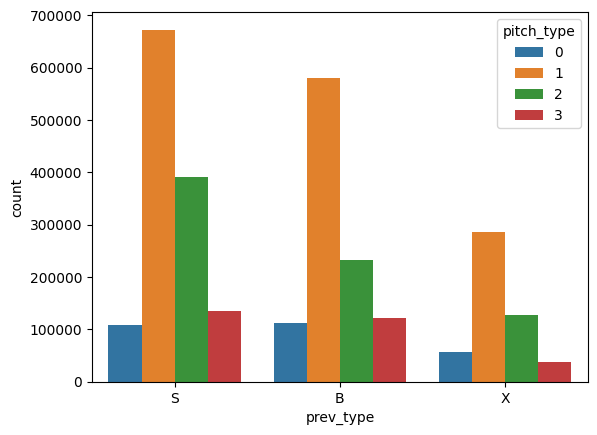

In [23]:
sn.countplot(df_final, x = 'prev_type', hue = 'pitch_type')

In [24]:
df_final.head()

,type,pitch_type,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,inning,p_score,p_throws,stand,prev_pitch_type,prev_type
0,S,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,NaN,NaN
1,S,1,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1,0,0,0,1.0,S
2,S,1,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1,0,0,0,1.0,S
3,B,1,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,1,0,0,0,1.0,S
4,B,2,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,1,0,0,0,1.0,B


In [25]:
df_final.isna().any()

type               False
pitch_type         False
b_score            False
b_count            False
s_count            False
outs               False
pitch_num          False
on_1b              False
on_2b              False
on_3b              False
inning             False
p_score            False
p_throws           False
stand              False
prev_pitch_type     True
prev_type           True
dtype: bool

In [26]:
df_final = df_final.dropna(axis = 'rows')

In [27]:
df_final = pd.get_dummies(df_final)

In [28]:
df_final.head()

,pitch_type,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,inning,p_score,p_throws,stand,prev_pitch_type,type_B,type_S,type_X,prev_type_B,prev_type_S,prev_type_X
1,1,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1,0,0,0,1.0,0,1,0,0,1,0
2,1,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1,0,0,0,1.0,0,1,0,0,1,0
3,1,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,1,0,0,0,1.0,1,0,0,0,1,0
4,2,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,1,0,0,0,1.0,1,0,0,1,0,0
5,1,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,1,0,0,0,2.0,0,0,1,1,0,0


In [30]:
df_final.head()

,pitch_type,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,inning,p_score,p_throws,stand,prev_pitch_type,type_B,type_S,type_X,prev_type_B,prev_type_S,prev_type_X
1,1,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1,0,0,0,1.0,0,1,0,0,1,0
2,1,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1,0,0,0,1.0,0,1,0,0,1,0
3,1,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,1,0,0,0,1.0,1,0,0,0,1,0
4,2,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,1,0,0,0,1.0,1,0,0,1,0,0
5,1,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,1,0,0,0,2.0,0,0,1,1,0,0


In [31]:
df_final = df_final.drop(['type_B', 'type_S', 'type_X'], axis = 'columns')
df_final.head()

,pitch_type,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,inning,p_score,p_throws,stand,prev_pitch_type,prev_type_B,prev_type_S,prev_type_X
1,1,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1,0,0,0,1.0,0,1,0
2,1,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1,0,0,0,1.0,0,1,0
3,1,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,1,0,0,0,1.0,0,1,0
4,2,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,1,0,0,0,1.0,1,0,0
5,1,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,1,0,0,0,2.0,1,0,0


<Axes: xlabel='pitch_type', ylabel='count'>

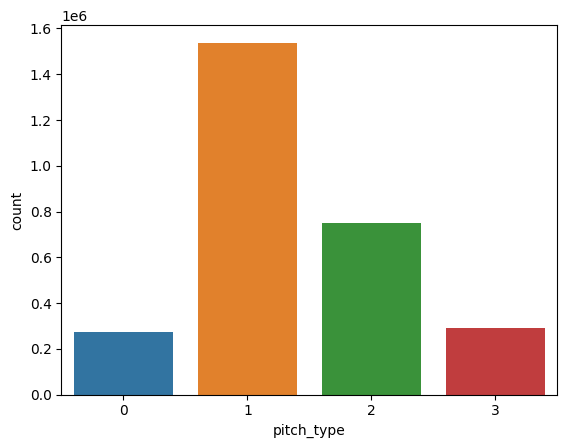

In [32]:
sn.countplot(df_final, x = 'pitch_type')

<Axes: xlabel='prev_pitch_type', ylabel='count'>

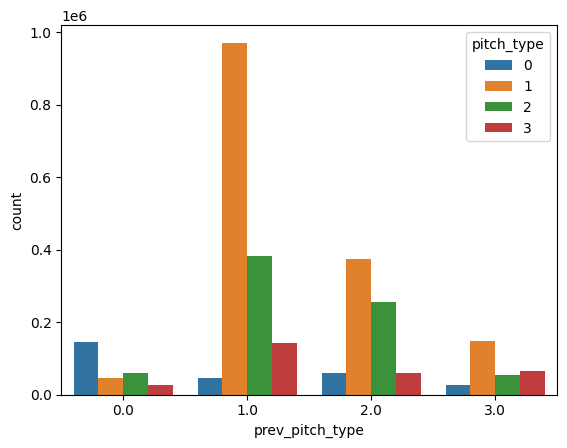

In [33]:
sn.countplot(df_final, x = 'prev_pitch_type', hue = 'pitch_type')

<Axes: xlabel='b_count', ylabel='count'>

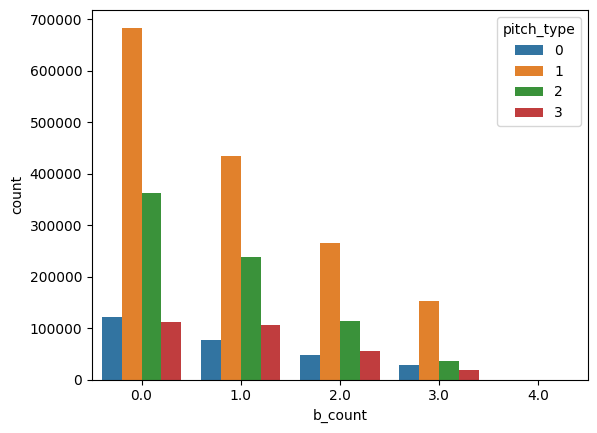

In [34]:
sn.countplot(df_final, x = 'b_count', hue = 'pitch_type')

In [35]:
df_final[df_final['pitch_type']==1].shape

(1538174, 17)

In [36]:
df_final.head()

,pitch_type,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,inning,p_score,p_throws,stand,prev_pitch_type,prev_type_B,prev_type_S,prev_type_X
1,1,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1,0,0,0,1.0,0,1,0
2,1,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1,0,0,0,1.0,0,1,0
3,1,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,1,0,0,0,1.0,0,1,0
4,2,0.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,1,0,0,0,1.0,1,0,0
5,1,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,1,0,0,0,2.0,1,0,0


<Axes: xlabel='stand', ylabel='count'>

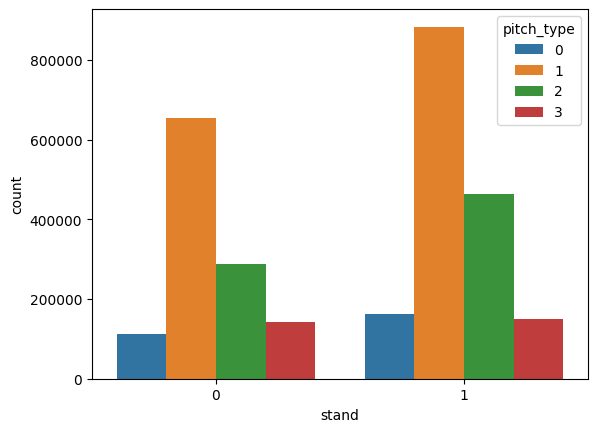

In [37]:
sn.countplot(df_final, x = 'stand', hue = 'pitch_type')

<Axes: xlabel='p_throws', ylabel='count'>

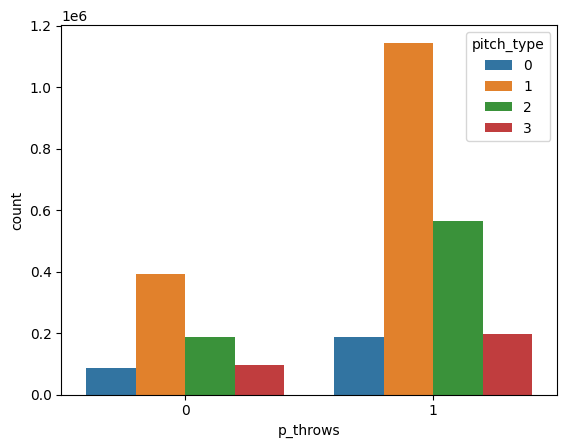

In [38]:
sn.countplot(df_final, x = 'p_throws', hue = 'pitch_type')

In [39]:
df_final = df_final.drop(['p_throws', 'stand', 'p_score', 'b_score'], axis = 'columns')
df_final.head()

,pitch_type,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,inning,prev_pitch_type,prev_type_B,prev_type_S,prev_type_X
1,1,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1,1.0,0,1,0
2,1,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1,1.0,0,1,0
3,1,0.0,2.0,0.0,4.0,0.0,0.0,0.0,1,1.0,0,1,0
4,2,1.0,2.0,0.0,5.0,0.0,0.0,0.0,1,1.0,1,0,0
5,1,2.0,2.0,0.0,6.0,0.0,0.0,0.0,1,2.0,1,0,0


In [40]:
df_final['on_base'] = df_final.on_1b + df_final.on_2b + df_final.on_3b
df_final = df_final.drop(['on_1b', 'on_2b', 'on_3b'], axis = 'columns')
df_final.head()

,pitch_type,b_count,s_count,outs,pitch_num,inning,prev_pitch_type,prev_type_B,prev_type_S,prev_type_X,on_base
1,1,0.0,1.0,0.0,2.0,1,1.0,0,1,0,0.0
2,1,0.0,2.0,0.0,3.0,1,1.0,0,1,0,0.0
3,1,0.0,2.0,0.0,4.0,1,1.0,0,1,0,0.0
4,2,1.0,2.0,0.0,5.0,1,1.0,1,0,0,0.0
5,1,2.0,2.0,0.0,6.0,1,2.0,1,0,0,0.0


In [42]:
df_final = df_final.drop(['inning'], axis = 'columns')
df_final.head()

,pitch_type,b_count,s_count,outs,pitch_num,prev_pitch_type,prev_type_B,prev_type_S,prev_type_X,on_base
1,1,0.0,1.0,0.0,2.0,1.0,0,1,0,0.0
2,1,0.0,2.0,0.0,3.0,1.0,0,1,0,0.0
3,1,0.0,2.0,0.0,4.0,1.0,0,1,0,0.0
4,2,1.0,2.0,0.0,5.0,1.0,1,0,0,0.0
5,1,2.0,2.0,0.0,6.0,2.0,1,0,0,0.0
